<h1>MOOC Course Online Discussion Forum: A Computational Content Analysis Approach</h1>

In 2011, Massive Open Online Courses (MOOCs) made frequent headline news after a free online course at Stanford University on artificial intelligence attracted more than 580,000 students around the globe. As more and more institutions joined MOOCs, this relatively untested method of pedagogical delivery raised the question of the effectiveness of online learning. With the spreading of Coronavirus becomes more and more severe, schools around the globe are forced to switch to online learning. Research on online course becomes even more relevant in this time of crisis because most of the schools are in an experimenting process. 

Online learning is meant to create a “virtual community of inquiry” that allows learners to construct experiences and knowledge through analysis of the subject matter. In a face-to-face environment, this kind of reflection is often accomplished via synchronous, interactive discussions and problem-solving sessions. Thus, I choose to look into the online discussion forum. 

<h3>What?</h3>

In this project, I conducted a secondary analysis of the dataset of the course “Introduction to Psychology as a Science” offered through Coursera collaboratively by Georgia Institute of Technology and Carnegie Mellon University. Different from other Coursera courses, this course incorporated elements of the OLI (Open Learning Initiative) learning environment, which could be considered as an innovative feature of online courses. The course was designed as a 12-week introductory course. For each week of the class, the course targeted a major topic such as memory, brain structures, nervous system. (Wang, 2015) Our discussion forum dataset consisted of 3864 posts of 491 users. My unit of analysis is the message each student posts on the forum.

<h3>How?</h3>
Goal: <br>
1. Explore the dataset and try to find some interesting features <br>
2. Test out Dr. Xu Wang's coding scheme, see how successfully her classifers work out <br> 

I will use techniques introduced in the Computational Content Analysis class in this project.
1. **Classification** (WEEK 3)<br>
2. **Counting Words and Phrases** (WEEK 4)<br>
3. **Semantic Influence Network** (WEEK 5)<br>
5. **Vector Space Word Embedding** (WEEK 7)<br>


In [3]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.manifold #For a manifold plot
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.metrics.pairwise #For cosine similarity

import requests #for http requests
import pandas #gives us DataFrames
import nltk #For tokenizing and normalizing
import spacy
import wordcloud #Makes word clouds
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import matplotlib.cm #Still for graphics
import seaborn as sns #makes our plots look nicer
import networkx as nx
import scipy as sp #for interp
import gensim#For topic modeling



import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import subprocess
import io
import tempfile
import itertools

#Displays the graphs
import graphviz #You also need to install the command line graphviz


%matplotlib inline

<h2>1. Prepare the dataset.</h2>

In [5]:
with open('../week-4/posts.txt') as f:
    posts = f.read()

In [6]:
posts = posts.replace("<br />", '')
posts = posts.replace("\n", '')
posts = posts.replace('"', '')
posts = posts.replace('\t', '')
posts = posts.replace('>', '')
posts = posts.replace('<', '')
posts = posts.replace('nbsp', '')
posts = posts.replace('&', '')

In [7]:
posts_clean = posts.rsplit('. ')
len(posts_clean)

9136

In [8]:
nlp = spacy.load("en")

In [9]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [10]:
word_tokenize(posts[0:99999])

['Hi!My',
 'name',
 'is',
 'Julia',
 'I',
 'am',
 'from',
 'Spain',
 'and',
 'I',
 'will',
 'begin',
 'my',
 'biochemistry',
 'doctoral',
 'studies',
 'on',
 'August',
 'in',
 'New',
 'York',
 'This',
 'is',
 'my',
 'second',
 'course',
 'from',
 'Coursera',
 'and',
 'I',
 'am',
 'really',
 'excited',
 'I',
 'am',
 'absolutely',
 'interested',
 'in',
 'Neuroscience',
 'and',
 'Psychology',
 'The',
 'Quiz',
 'is',
 'still',
 'open',
 'Once',
 'it',
 'closes',
 'tomorrow',
 'answers',
 'or',
 'their',
 'locations',
 'may',
 'be',
 'given',
 'in',
 'the',
 'forum',
 'You',
 'may',
 'wait',
 'for',
 'a',
 'day',
 'This',
 'assignment',
 'was',
 'like',
 'bowling',
 'with',
 'a',
 'curtain',
 'in',
 'front',
 'of',
 'the',
 'pins',
 'You',
 'roll',
 'the',
 'ball',
 'and',
 'hear',
 'pins',
 'falling',
 'down',
 'Someone',
 'says',
 'Okay',
 'you',
 "'ve",
 'only',
 'got',
 'two',
 'pins',
 'left',
 'And',
 'as',
 'you',
 'get',
 'ready',
 'to',
 'knock',
 'down',
 'those',
 'two',
 'pins',

In [11]:
whTokens = word_tokenize(posts[0:99999])

In [12]:
whText = nltk.Text(whTokens)

MOOCIndex = nltk.text.ConcordanceIndex(whText) 
MOOCIndex.print_concordance('psychology')

Displaying 20 of 20 matches:
onships I was always interested in psychology but I have never studied it so I h
 course becouse I 'm interested in psychology and I would like to improve my eng
al if you are really interested in psychology the best course in coursera in my 
cal disorders i is termed abnormal psychology About 1 in every 4 Americans or ov
 is a lot of reading however it is psychology so there is a lot of reading in it
lop further understanding of human psychology and the mind Thanks Alex Prof Smit
Peru I 'm an English teacher and a psychology student I want to learn psychology
psychology student I want to learn psychology through a different aproach and ge
o widen my conceptual knowledge in psychology Thanks for reminding me about Modu
e!/p piOne of the big questions in psychology is nature versus nurture Discuss t
meet all of you I 'm interested in psychology of relationships if I 'm not mista
 mistaken this is a part of social psychology especially those of men and women 

/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecate

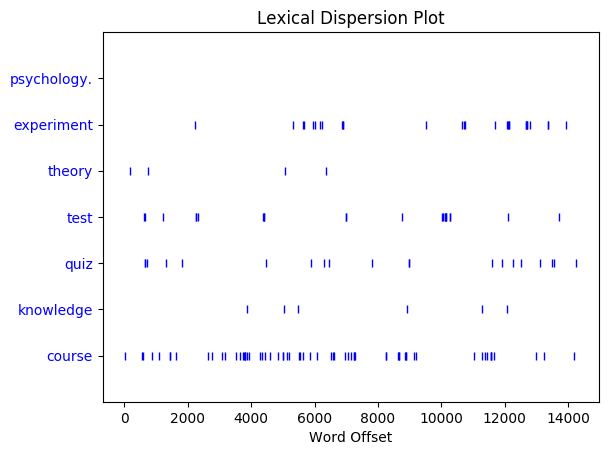

In [13]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['psychology.','experiment', 'theory', 'test' ,'quiz', 'knowledge', 'course'])
sns.set() #Re-enabling seaborn

<h2>2. Normalize the Text</h2>

In [14]:
MOOC = pandas.read_csv('../week-4/allpostcomment_coded.csv', index_col=0)
MOOC[:8]

,post number,comment,post,code,thread starter,previous post
participationid,,,,,,
1,1,0,"Hi!<br />My name is Julia, I am from Spain and...",O,My name is NAME509825 NAME509825. I'm 17 and w...,Hello My name is NAME1017864 I am From Utah. G...
2,1,0,The Quiz is still open. Once it closes tomorro...,A2,I did not give the correct answer for these tw...,I did not give the correct answer for these tw...
3,1,0,This assignment was like bowling with a curtai...,A2,My experience with this course so far has been...,"In my humble opiniÃ³n ""the data would be analy..."
4,1,0,I cannot find a link to input my written assig...,A2,"Hi, I did not understand how assignments works...","Hi, I did not understand how assignments works..."
5,1,0,"My ""theory"" is that it's just a technical prob...",A2,the grader marked question 9's right answer of...,I experienced the same thing - can ysomebody c...
6,1,0,"Oh, and Christine,<br /><br />You were right t...",O,I've done several Coursera classes and I'm int...,"Christine and Eric,<br /><br />You two, and on..."
7,1,0,"I am not involved in any age gap relationship,...",A2,According to the info in OIL; younger couples ...,It will end up in cheating by 20 on 40.<br />J...
8,1,0,Will the final exam be timed? <br />,A2,Hello !<br />I wonder what means:&nbsp;<span>F...,Great cause I saw it and was wondering<br /><b...


Clean the post

In [16]:
MOOC['post'] = MOOC['post'].str.replace("<br />", '').replace("\n", '').replace('"', '').replace('\t', '').replace('>', '').replace('<', '').replace('nbsp', '').replace('&', '').replace('%', '').replace('name2379412', '').replace("https://", '')
MOOC['post'].head(10)

participationid
1     Hi!My name is Julia, I am from Spain and I wil...
2     The Quiz is still open. Once it closes tomorro...
3     This assignment was like bowling with a curtai...
4     I cannot find a link to input my written assig...
5     My "theory" is that it's just a technical prob...
6     Oh, and Christine,You were right that a whole ...
7     I am not involved in any age gap relationship,...
8                       Will the final exam be timed?  
9     I guess we already had too many tests and surv...
10    Got 21. Thanks to those who assessed my work, ...
Name: post, dtype: object

In [17]:
MOOC['tokenized_text'] = MOOC['post'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

Get rid of Stopwords

In [18]:
MOOC['word_counts'] = MOOC['tokenized_text'].apply(lambda x: len(x))
countsDict = {}
for word in MOOC['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)

In [19]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'course':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq.append('<br />')
stop_words_freq.append('<br')
stop_words_freq.append('hi!<br')
stop_words_freq.append('/>my')
stop_words_freq.append('/>it')
stop_words_freq.append('nbsp')
stop_words_freq.append('a&nbsp')
stop_words_freq.append('&nbsp')
stop_words_freq.append('nbsp;instead')
stop_words_freq.append('nbsp;')
stop_words_freq.append('/>&nbsp;<br, />&nbsp;&nbsp')
stop_words_freq.append('div')
stop_words_freq.append('/>i')
stop_words_freq.append('/>3')
stop_words_freq.append('%')
stop_words_freq

['the',
 'I',
 'to',
 'and',
 'of',
 'a',
 '>',
 'is',
 'in',
 'that',
 'you',
 'it',
 'for',
 '<',
 'be',
 'not',
 'have',
 'this',
 'are',
 'on',
 'with',
 'my',
 'as',
 'do',
 'was',
 "n't",
 'but',
 '<br />',
 '<br',
 'hi!<br',
 '/>my',
 '/>it',
 'nbsp',
 'a&nbsp',
 '&nbsp',
 'nbsp;instead',
 'nbsp;',
 '/>&nbsp;<br, />&nbsp;&nbsp',
 'div',
 '/>i',
 '/>3',
 '%']

In [20]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [21]:
MOOC['normalized_tokens'] = MOOC['post'].apply(lambda x: normalizeTokens(x, extra_stop=stop_words_freq))

In [22]:
MOOC['normalized_tokens_count'] = MOOC['normalized_tokens'].apply(lambda x: len(x))

MOOC

,post number,comment,post,code,thread starter,previous post,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
participationid,,,,,,,,,,
1,1,0,"Hi!My name is Julia, I am from Spain and I wil...",O,My name is NAME509825 NAME509825. I'm 17 and w...,Hello My name is NAME1017864 I am From Utah. G...,"[Hi!My, name, is, Julia, I, am, from, Spain, a...",41,"[hi!my, julia, spain, begin, biochemistry, doc...",18
2,1,0,The Quiz is still open. Once it closes tomorro...,A2,I did not give the correct answer for these tw...,I did not give the correct answer for these tw...,"[The, Quiz, is, still, open, Once, it, closes,...",25,"[quiz, open, close, tomorrow, answer, location...",10
3,1,0,This assignment was like bowling with a curtai...,A2,My experience with this course so far has been...,"In my humble opiniÃ³n ""the data would be analy...","[This, assignment, was, like, bowling, with, a...",89,"[assignment, like, bowl, curtain, pin, roll, b...",29
4,1,0,I cannot find a link to input my written assig...,A2,"Hi, I did not understand how assignments works...","Hi, I did not understand how assignments works...","[I, can, not, find, a, link, to, input, my, wr...",22,"[find, link, input, write, assignment, need, f...",8
5,1,0,"My ""theory"" is that it's just a technical prob...",A2,the grader marked question 9's right answer of...,I experienced the same thing - can ysomebody c...,"[My, theory, is, that, it, 's, just, a, techni...",20,"[theory, technical, problem]",3
...,...,...,...,...,...,...,...,...,...,...
3860,0,1,"EMAIL25707 My assignment is complete and I, li...",A1,I received a 19. It appears that I was scored ...,Do I detect a bit of an attitude? Probably not...,"[EMAIL25707, My, assignment, is, complete, and...",56,"[email25707, assignment, complete, like, stude...",28
3861,0,1,"Fernanda, The idea of a pre-test is to take it...",A2,Hey!&nbsp;I would like to know about the Psych...,I actually had fun answering this Pre-test yes...,"[Fernanda, The, idea, of, a, pre, test, is, to...",95,"[fernanda, idea, pre, test, find, know, point,...",29
3862,0,1,That's not the reason why I deleted my posts ;...,O,"""In addition peer assessment puts people with ...","I did not ""despise"" your other comments based ...","[That, 's, not, the, reason, why, I, deleted, ...",18,"[reason, delete, post, google]",4


<h2>3. Data Exploration</h2>

In [24]:
sample = MOOC['normalized_tokens']
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in MOOC['normalized_tokens'][1:30].sum()))
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

In [25]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags
MOOC['normalized_tokens_POS'] = [spacy_pos(t) for t in MOOC['post']]

The frequency of each part of speech for each word

In [26]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in MOOC['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives. The OLI is a particular word that describe the interactive feature of the online course.

In [27]:
whcfdist_POStoWord['JJ']

FreqDist({'other': 432, 'good': 376, 'final': 333, 'same': 314, 'first': 310, 'many': 304, 'different': 191, 'great': 186, 'oli': 172, 'right': 156, ...})

In [28]:
whcfdist_POStoWord['NN'].most_common(5)

[('course', 1021),
 ('assignment', 508),
 ('time', 455),
 ('%', 448),
 ('psychology', 396)]

In [29]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

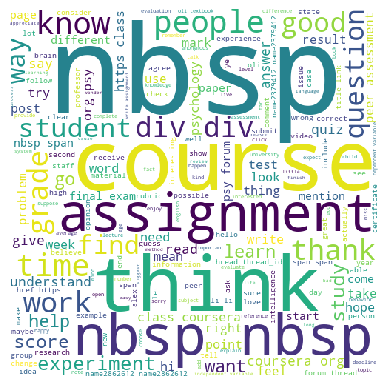

In [30]:
wc = wordcloud.WordCloud(background_color="white", max_words=200, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(MOOC['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("MOOC_word_cloud.pdf", format = 'pdf')

Bigram

In [32]:
MOOCBigrams = nltk.collocations.BigramCollocationFinder.from_words(MOOC['normalized_tokens'].sum())

In [33]:
def bigramScoring(count, wordsTuple, total):
    return count

print(MOOCBigrams.nbest(bigramScoring, 10))

[('peer', 'assessment'), ('final', 'exam'), ('name2862612', 'name2862612'), ('psy-001', 'forum'), ('/p', 'p'), ('href="https://class.coursera.org', 'psy-001'), ('oli', 'textbook'), ('™', 's'), ('write', 'assignment'), ('dependent', 'variable')]


In [35]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
MOOCBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('peer', 'assessment'), 1739.4295432463894),
 (('final', 'exam'), 1704.6623872852915),
 (('psy-001', 'forum'), 1364.2413394206992),
 (('name2862612', 'name2862612'), 1356.9074138166952),
 (('href="https://class.coursera.org', 'psy-001'), 1341.3208707960869),
 (('/p', 'p'), 985.9634113123793),
 (('™', 's'), 927.2359321699521),
 (('name2862612bname2862612rname2862612', 'name2862612'), 907.9415659469221),
 (('dependent', 'variable'), 778.2756922421829),
 (('oli', 'textbook'), 773.7968162255875),
 (('signature', 'track'), 668.0079149385903),
 (('independent', 'variable'), 660.321015943425),
 (('name2379412', 'name2379412'), 659.8648240471507),
 (('name2379412bname2379412rname2379412', 'name2379412'), 644.818429332924),
 (('look', 'forward'), 540.055717584502),
 (('good', 'luck'), 503.5901632578869),
 (('™', 't'), 487.64119019982644),
 (('target=', 'title="link'), 457.1042583202838),
 (('year', 'old'), 447.9468068861985),
 (('statement', 'accomplishment'), 444.5572225928544),
 (('+', '+')

Trigram

In [37]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
MOOCTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(MOOC['normalized_tokens'].sum())
MOOCTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('name2862612bname2862612rname2862612', 'name2862612', 'name2862612'),
  8.42611542985469),
 (('href="https://class.coursera.org', 'psy-001', 'forum'), 8.366552746346363),
 (('name2862612', 'name2862612', 'name2862612'), 6.9998759791548215),
 (('name2379412bname2379412rname2379412', 'name2379412', 'name2379412'),
  6.855643375813737),
 (('name2862612', 'name2862612bname2862612rname2862612', 'name2862612'),
  6.244951660197464),
 (('name2862612', 'name2862612', 'name2862612bname2862612rname2862612'),
  5.744512271602653),
 (('question', 'final', 'exam'), 5.290749761366866),
 (('psy-001', 'human_grading', 'view'), 5.196144713676081),
 (('view', 'course', 'zipcode8'), 5.1961005737059445),
 (('human_grading', 'view', 'course'), 5.1960948127058675),
 (('nature', 'versus', 'nurture'), 5.0990140414841445),
 (('+', '+', '+'), 4.99999356928951),
 (('target="_blank', 'href="https://class.coursera.org', 'psy-001'),
  4.999983797048091),
 (('course', 'zipcode8', 'assessments/8'), 4.8989646556778

We want to see whether "peer assessment" is a collocation. We can check this by looking at the conditional frequency of the word "peer". 

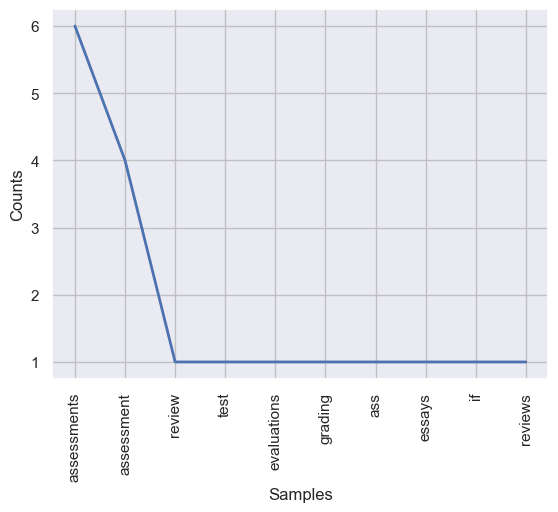

In [41]:
wh_bigrams = nltk.bigrams(whText)
wh_cfd_bi = nltk.ConditionalFreqDist(wh_bigrams)
wh_cfd_bi['peer'].plot()

<h2>4. Semantic Network Analysis</h2>

In [43]:
MOOC['tokenized_post'] = MOOC['post'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
MOOC['normalized_post'] = MOOC['tokenized_post'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [44]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [45]:
g = wordCooccurrence(MOOC['normalized_post'][:100].sum())
nx.to_numpy_matrix(g)[:10, :10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [46]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

In [47]:
MOOCVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
MOOCVects_incidence = MOOCVectorizer.fit_transform(MOOC['post'][:100])

In [48]:
MOOCVects_incidence.shape

(100, 1079)

In [49]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((MOOCVectorizer.get_feature_names()[i] for i in range(MOOCVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(MOOCVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, MOOCVectorizer.get_feature_names()[w], {'weight' : MOOCVects_incidence[d, w]}) for d, w in zip(*MOOCVects_incidence.nonzero())))

We need to filter to get insight

In [50]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [51]:
gDoc = contractNetwork(g_2mode, 'doc')

In [52]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1649
Average degree:  32.9800


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


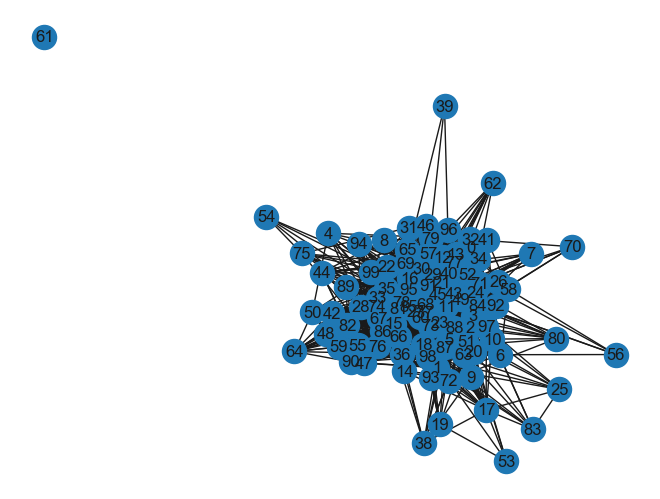

In [53]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

Interesting, 61 doc seems to be an outlier. Lets draw the graph with high and low weight edges distinguished.

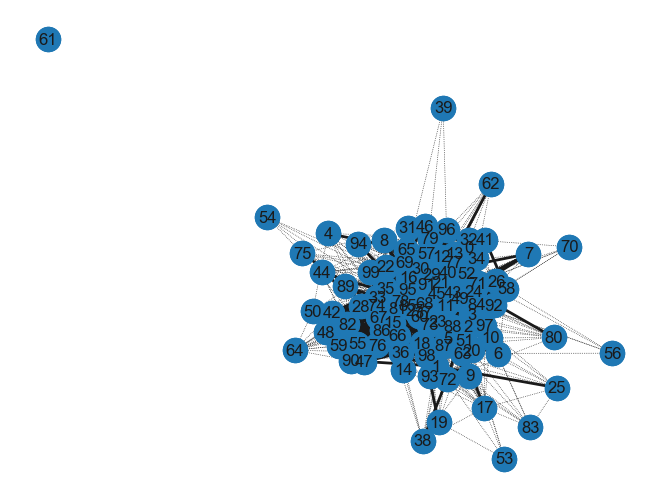

In [54]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [55]:
print(len(MOOC.iloc[61]['post']),"words:","\n",MOOC.iloc[61]['post'].strip().replace('  ', '\n'))

182 words: 
 I meni je drago sto mozemo suradivati ( niko ovdje nije strucan iz psihologije cini mi se - zato smo je valjda upisali) u svakom slucaju cestitam na prvom polozenom testu sretno!!!!


This post is Croatian, not English. That's why it is not linked other posts. After translating, the first sentence means "And I'm glad we can work together..."

In [56]:
g = wordCooccurrence(MOOC['normalized_post'][:100].sum())

In [57]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 2])

In [58]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [59]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [60]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 101
Number of edges: 198
Average degree:   3.9208


We got a smaller size, now let's try to visualize it. 

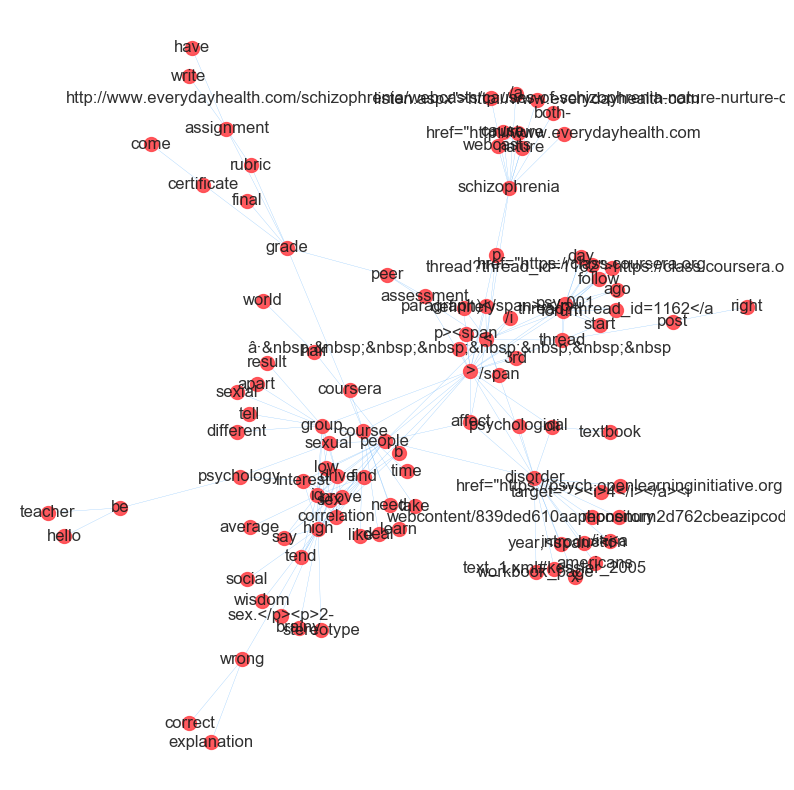

In [61]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

This is good. There are some unclean data such as nbsp and website link because the discussion forum posts of students are very dirty.

we can find cliques, or completely connected sets of nodes.

In [62]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

sex, high, iq, drive, prove, correlation, find


So some of the closely related words are "sex, high, iq, drive, prove, correlation, find". This makes sense because this MOOC course is a psychology course and it may delves into this topic. 

Network

In [64]:
dcentralities = nx.degree_centrality(giant)

In [65]:
dcentralities['iq']

0.14

1. Closeness Centrality

Closeness centrality, or the average Euclidean or path distance between a node and all others in the network. A node with the highest closeness centrality is most likely to send a signal with the most coverage to the rest of the network.

In [67]:
centralities = nx.closeness_centrality(giant)

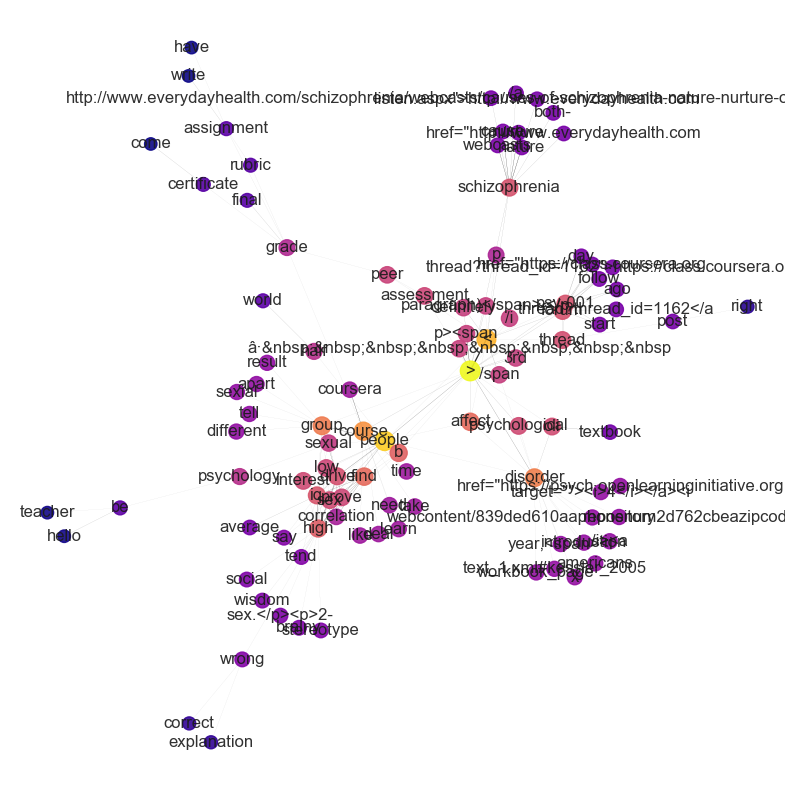

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma'))

Top 10 Words

In [69]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('>', 0.4807692307692308),
 ('people', 0.45045045045045046),
 ('<', 0.4329004329004329),
 ('course', 0.4065040650406504),
 ('disorder', 0.390625),
 ('group', 0.3875968992248062),
 ('find', 0.37174721189591076),
 ('affect', 0.37037037037037035),
 ('b', 0.36231884057971014),
 ('high', 0.3597122302158273)]

The words show up here such as "course", "disorder", "group" are mostly academic/discipline terms.

Bottom 10 Words

In [70]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('certificate', 0.2364066193853428),
 ('final', 0.23529411764705882),
 ('correct', 0.211864406779661),
 ('explanation', 0.211864406779661),
 ('right', 0.205761316872428),
 ('teacher', 0.19455252918287938),
 ('hello', 0.19455252918287938),
 ('have', 0.1926782273603083),
 ('write', 0.1926782273603083),
 ('come', 0.19157088122605365)]

The words show up here are mostly logistic/casual terms.

2. Eigenvalue Centrality

Eignvector centrality, an approach that weights degree by the centrality of those to whom one is tied (and the degree to whom they are tied, etc.) In short, its an $n$th order degree measure.

In [72]:
centralities = nx.eigenvector_centrality(giant)

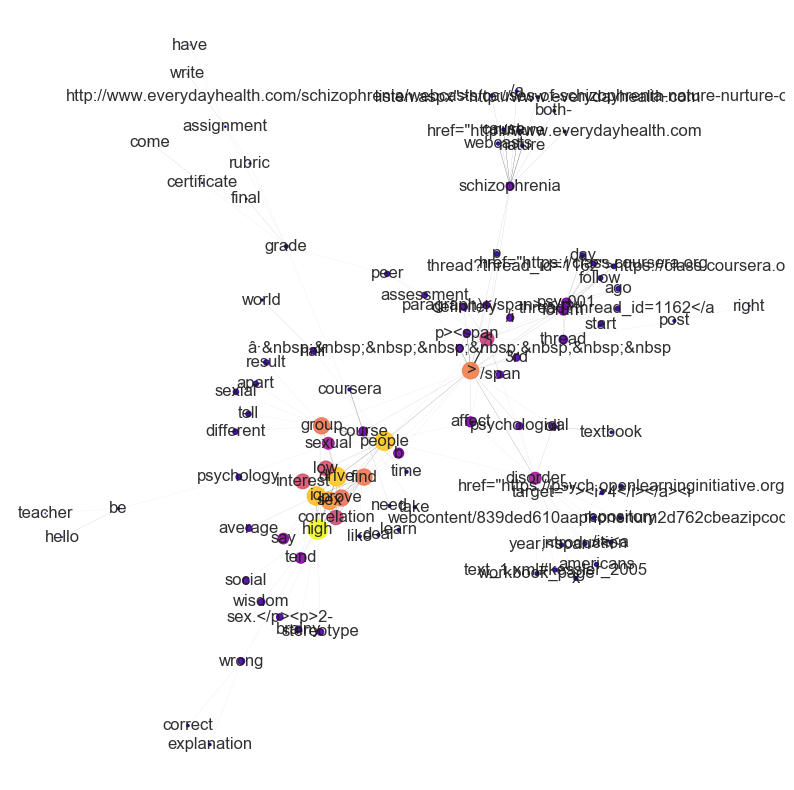

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
maxC = max(centralities.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in giant.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in giant.edges(data = True)))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in giant.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities[n] / maxC for n in giant.nodes],
        node_size = [centralities[n] / maxC * 200 for n in giant.nodes],
        cmap = plt.get_cmap('plasma')) 

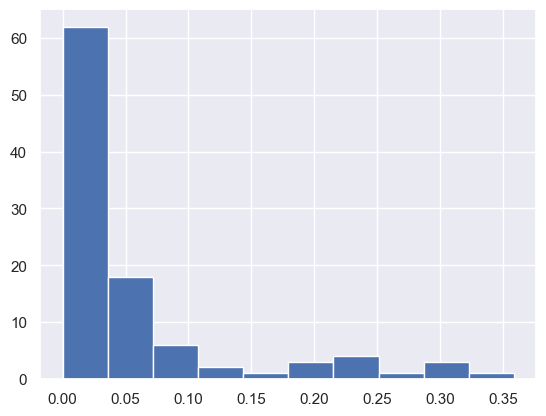

In [74]:
plt.hist(list(centralities.values()))
plt.show()

Top 10 Words

In [75]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('high', 0.3586133793780562),
 ('drive', 0.31672050535809476),
 ('people', 0.3167195978648418),
 ('iq', 0.3086112445794588),
 ('sex', 0.27058929071669097),
 ('>', 0.2466399778788388),
 ('find', 0.2390322470256942),
 ('group', 0.23709219627848374),
 ('prove', 0.23289673131378064),
 ('interest', 0.19498623739239865)]

Bottom 10 Words

In [76]:
sorted(centralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('assignment', 0.0014141971126021466),
 ('rubric', 0.0013852556826784762),
 ('certificate', 0.0012489233455172076),
 ('final', 0.0012347840492300918),
 ('right', 0.0007511790049585707),
 ('teacher', 0.00033004388904151805),
 ('hello', 0.00033004388904151805),
 ('have', 0.0001504716334483842),
 ('write', 0.0001504716334483842),
 ('come', 0.000132886205551115)]

Now we can filter the network and calculate the global measure.

In [78]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")    
        
    if rule=='number':# if filter by limiting the total number of nodes 
        
        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])
        
        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G
    
    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
        print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

In [79]:
giant_filtered30 = filterWords(giant, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
print(nx.info(giant_filtered30))

Total number of nodes(after filtering) in the graph is 25
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 58
Average degree:   4.6400


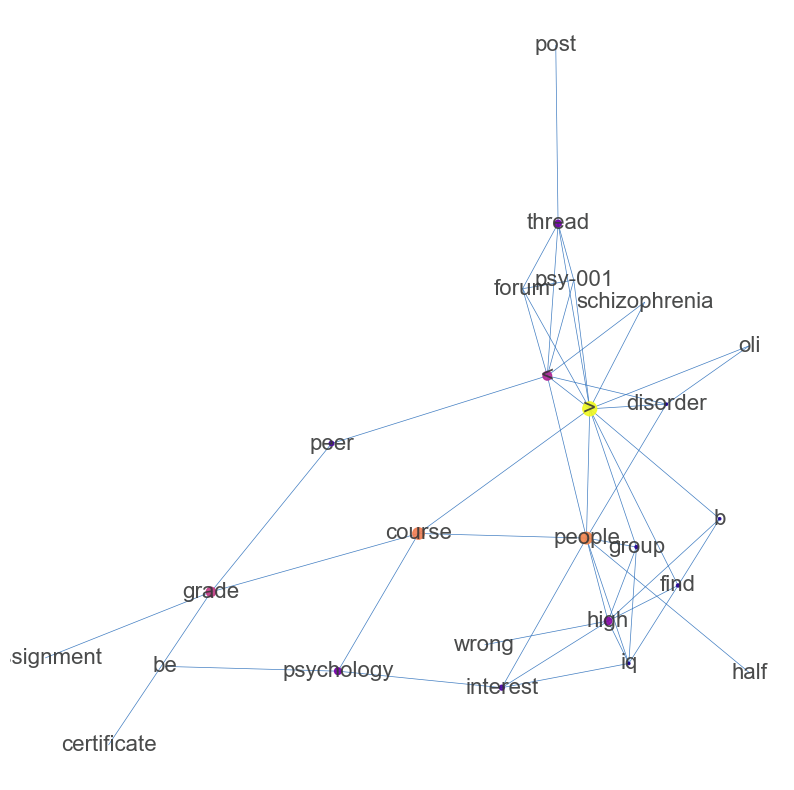

In [80]:
layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
        alpha = .9, 
        width = .5,
        node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
        node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       )

Global Statistics

In [82]:
nx.density(giant)

0.03920792079207921

Average Degree per Node

In [83]:
np.mean([v for w,v in nx.degree(giant)])

3.9207920792079207

Average Distance between any two nodes

In [84]:
nx.diameter(giant)

7

3. Non-Verb Network

In [86]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud_2020.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [87]:
gNV = posCooccurrence(MOOC['normalized_post'].sum(), 'NN', 'VB')

In [88]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 4535
Number of edges: 64185
Average degree:  28.3065


In [89]:
gNV.remove_edges_from([(n1,n2) for n1,n2,d in gNV.edges(data = True) if gNV.nodes[n1]['bipartite'] == gNV.nodes[n2]['bipartite']])

In [90]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 4535
Number of edges: 17369
Average degree:   7.6600


In [91]:
gNV.remove_edges_from([(n1, n2) for n1, n2, d in gNV.edges(data = True) if d['weight'] <= 5])
gNV.remove_nodes_from([n for n in gNV.nodes if len(set(gNV.neighbors(n))) <= 10])

In [92]:
print(nx.info(gNV))

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 203
Average degree:  11.2778


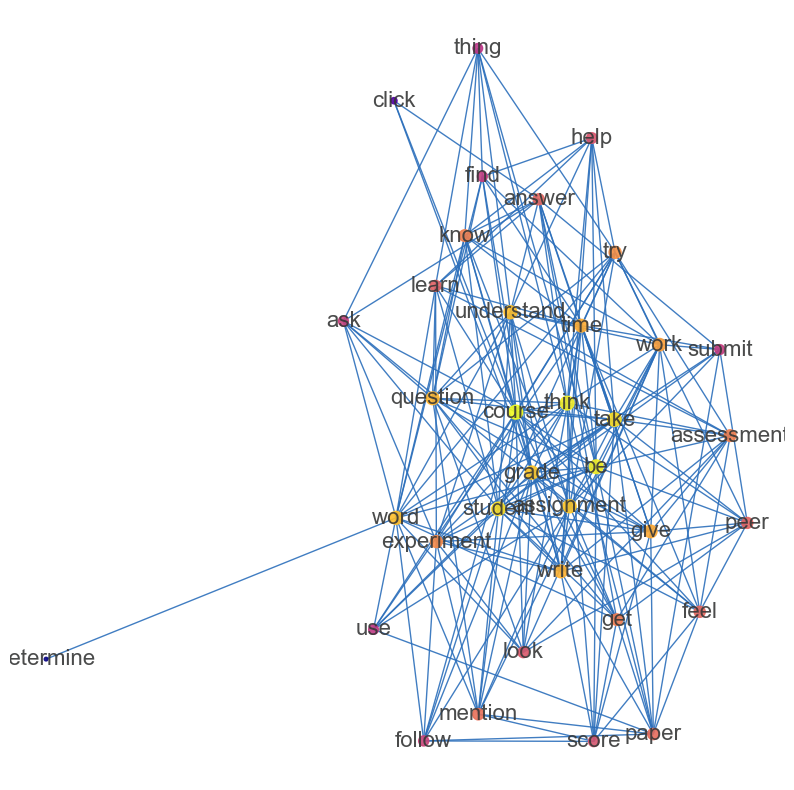

In [93]:
layout_nn = nx.spring_layout(gNV, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nv = nx.eigenvector_centrality(gNV)
maxC = max(centralities_nv.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gNV.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gNV.edges(data = True)))
nx.draw(gNV, ax = ax, pos = layout_nn, labels = {n: n for n in gNV.nodes()},
        #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nv[n] / maxC for n in gNV.nodes],
        node_size = [centralities_nv[n] / maxC * 100 for n in gNV.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('plasma'),
       ) 

4. Single Important Word Network

In [94]:
g_i = gNV.subgraph(['course'] + list(gNV.neighbors('course')))

In [95]:
print(nx.info(g_i))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 18
Average degree:   1.8947


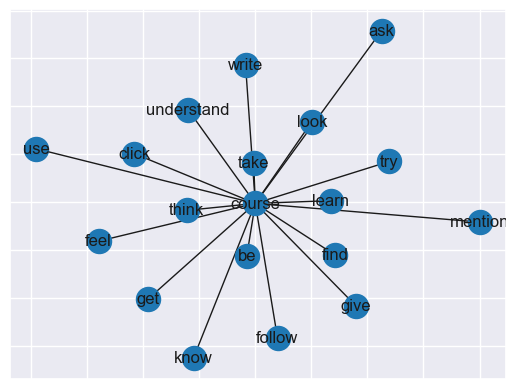

In [96]:
nx.draw_networkx(g_i)

Course is at the center of this network.

<h2>5. Classification - Test Out Xu Wang's Coding Scheme</h2>

Onsite vs. Offsite

1. Logistic Regression

In [99]:
MOOCCourseDiscussion = pandas.read_csv('../week-4/allpostcomment_coded.csv', index_col=0)

In [100]:
MOOCCourseDiscussion['category'] = [s == 'O' for s in MOOCCourseDiscussion['code']]

In [101]:
MOOCCourseDiscussion['tokenized_text'] = MOOCCourseDiscussion['post'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
MOOCCourseDiscussion['normalized_text'] = MOOCCourseDiscussion['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Split the dataset into Training and Testing Dataset

In [102]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(MOOCCourseDiscussion, holdBackFraction=holdBackFraction)

In [103]:
print(len(train_data_df))
print(len(test_data_df))

3092
772


In [104]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['post'])

In [105]:
TFVects.shape

(3092, 5540)

In [106]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [107]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [108]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


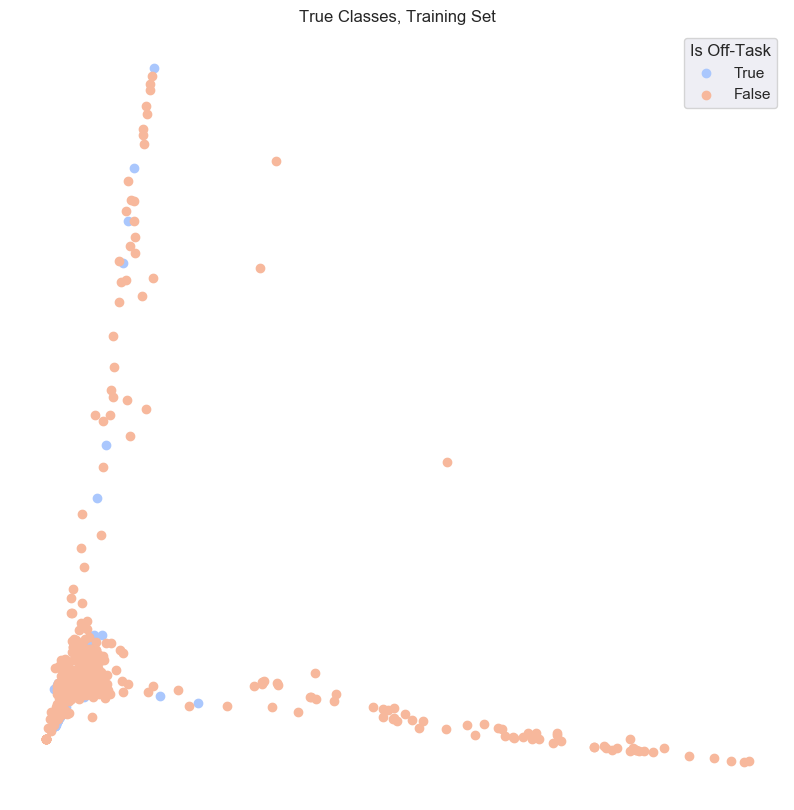

In [113]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = sns.color_palette(palette='coolwarm', n_colors = 2)

#Plot O
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not O
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Off-Task')
plt.title('True Classes, Training Set')
plt.show()

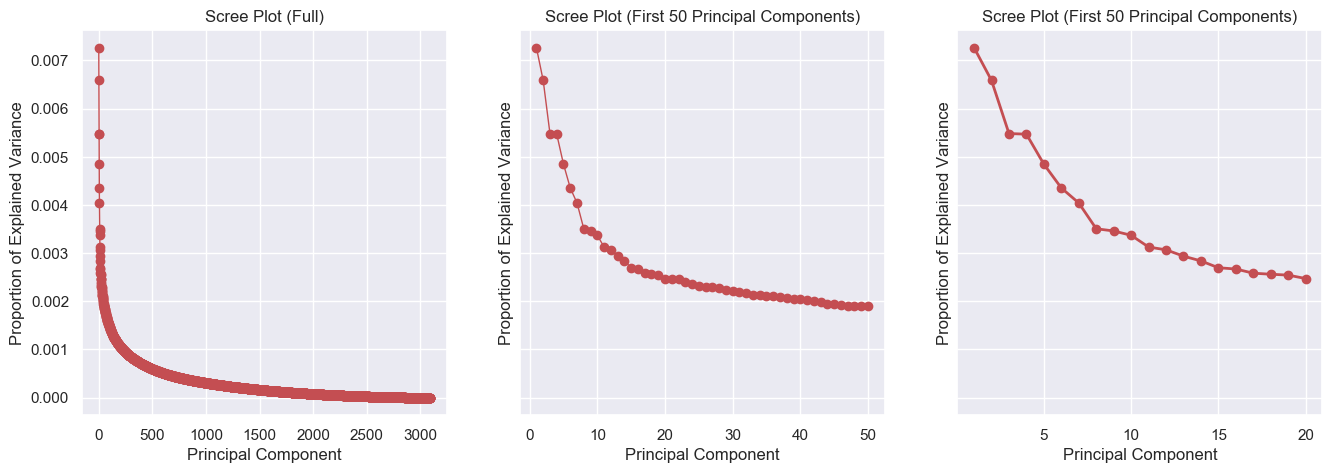

In [114]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

The PCA actually distinguishes between the on-task and off-task pretty well. 

Choose the first 10 components.

In [117]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [118]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how it performs on the training dataset. Fortunately, the accuracy is pretty high with 84.3%.

In [119]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.8428201811125485

Let's see how it performs on the testing dataset.

In [121]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['post'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.8458549222797928

The accuracy is almost the same at 84%. Now let's try improve the accuracy by applying TF-IDF.

In [123]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8958602846054333


In [124]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8911917098445595


89% seems to be the best we can get of a logistic regression model. 

Confusion Matrix

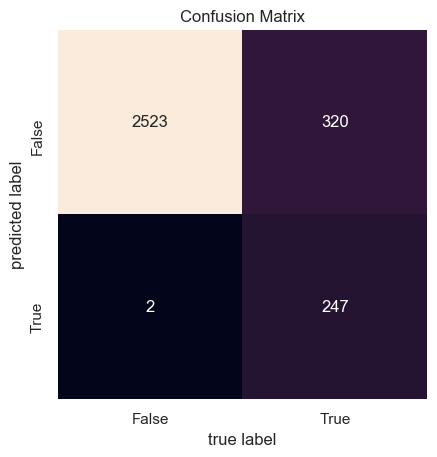

In [127]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_data_df)

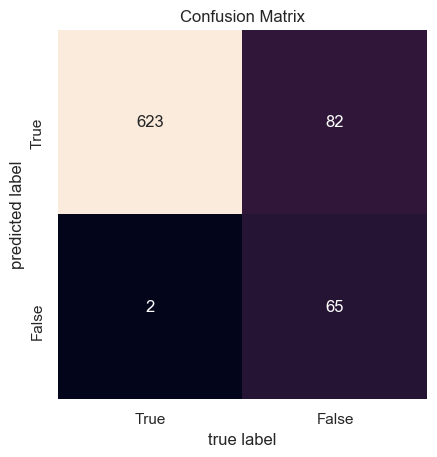

In [128]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

AUC

In [130]:
lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.10414,0.717417,0.887443,0.887387,0.999208
True,0.10414,0.717417,0.991968,0.535620,0.435626


In [131]:
lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.108808,0.719488,0.883688,0.883451,0.996800
True,0.108808,0.719488,0.970149,0.535195,0.442177


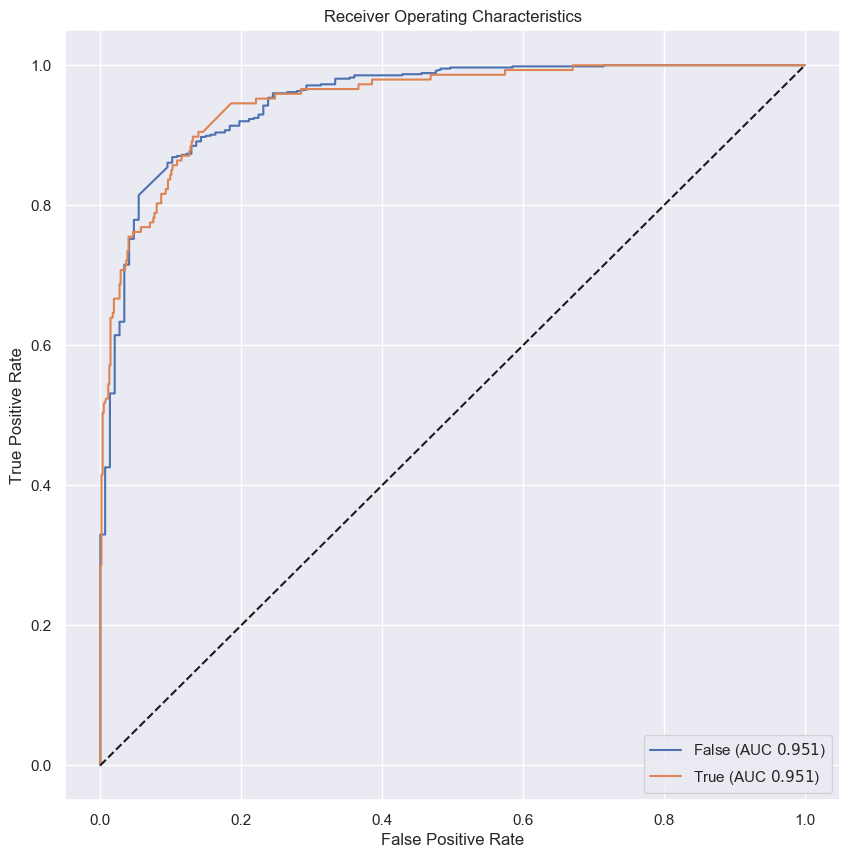

In [132]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

<h2>6. Semantic Space</h2>

Pick some Tags

In [134]:
keywords = ['oli', 'coursera', 'grade', 'students', 'textbook', 'course']

In [135]:
MOOC['tokenized_words'] = MOOC['post'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
MOOC['normalized_words'] = MOOC['tokenized_words'].apply(lambda x: lucem_illud_2020.normalizeTokens(x, lemma=False))

In [136]:
taggedDocs = []
for index, row in MOOC.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['thread starter']) #This lets us extract individual documnets since participation thread starter are unique
    docKeywords.append(row['code']) 
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
MOOC['TaggedAbstracts'] = taggedDocs

Train a Doc2Vec Model

In [137]:
MOOCD2V = gensim.models.doc2vec.Doc2Vec(MOOC['TaggedAbstracts'], size = 100) #Limiting to 100 dimensions

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words. 

In [139]:
MOOCD2V.docvecs[1000]

array([ 0.03254297, -0.03463545, -0.01464099, -0.04057338, -0.0336162 ,
        0.00450045,  0.00909298,  0.01925202, -0.00432776,  0.00838941,
        0.03143353, -0.00518699,  0.03402277,  0.00502059, -0.00393069,
        0.01634359,  0.01582904,  0.01263314, -0.02051174,  0.00574638,
       -0.02225602, -0.02336585, -0.00349882,  0.00967861, -0.03396229,
        0.02659325, -0.02899626,  0.01926985,  0.01815899, -0.00348331,
        0.0004848 ,  0.02608323,  0.03062497, -0.00501549, -0.00862442,
       -0.0096709 , -0.00946642, -0.00554767,  0.0150163 ,  0.01251264,
        0.00178003, -0.00762453,  0.03307955, -0.02455262, -0.01159082,
        0.01120968, -0.00894276,  0.04613885,  0.00657935,  0.00220517,
       -0.00901265, -0.02682538, -0.01021378,  0.02610029,  0.01723261,
       -0.00167778,  0.01771784,  0.00797824, -0.02132806, -0.00958016,
        0.01398986,  0.03119633, -0.00535469, -0.01661165, -0.00665367,
       -0.02735402,  0.00165145,  0.00276717, -0.00418565, -0.00

Since oli is an experimental feature of online course and I want to see students' general feedback online course experience. So I make this word combination.

In [141]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = MOOCD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, MOOCD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

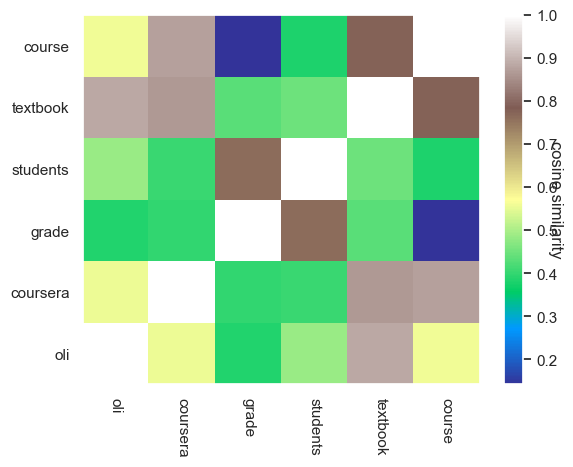

In [142]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten posts and our keywords:

In [146]:
MOOC['participationid'] = np.arange(len(MOOC))
targetDocs = MOOC['participationid'][:10]
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = MOOCD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, MOOCD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

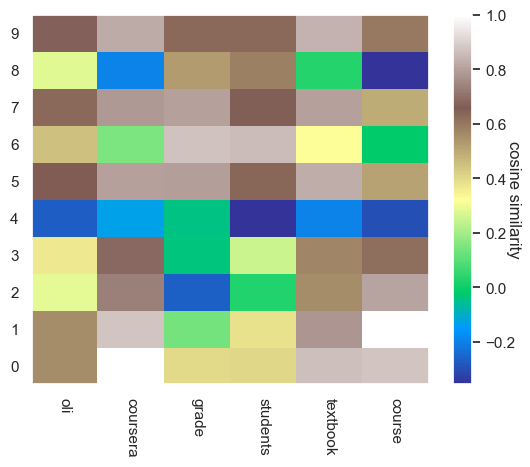

In [147]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)